# EDA
Here in this notebook we will perform some exploratory data analysis on application data.

In [1]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
import os 
os.chdir('drive/My Drive/Home_Credit_Default_Risk')

## Import libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing
import matplotlib.pyplot as plt
 

## Load application_train_test

In [4]:
application = pd.read_csv('application_train.csv')
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

In [0]:
application = application.replace({'TARGET':{0: 'repaid', 1: 'not repaid'}})

Some outlier as below:
* DAYS_EMPLOYED ==> 365243.000000	

In [0]:
application['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [0]:
application = application[application['CODE_GENDER']!='XNA']

In [0]:
application['CODE_GENDER'].describe()

count     307507
unique         2
top            F
freq      202448
Name: CODE_GENDER, dtype: object

In [0]:
application['DAYS_EMPLOYED'].replace({365243.000000:np.nan},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
print('Data shape: ',application.shape)

Data shape:  (307511, 122)


## Count and percentage of missing value in each column

In [0]:
count = application.isnull().sum().sort_values(ascending=False)
percentage = ((application.isnull().sum()/len(application)*100)).sort_values(ascending=False)
missing_application = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values for top 20 columns:')
missing_application.head(20)

Count and percentage of missing values for top 20 columns:


,Count,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


## Distribution of the target column

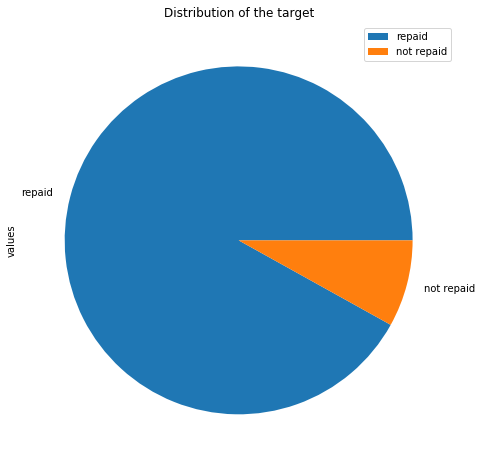

In [0]:
#application['TARGET'].astype(int).plot.hist()
contract_val = application['TARGET'].value_counts()
contract_df = pd.DataFrame({'values': contract_val.values},index=contract_val.index)
contract_df.plot.pie(y='values',title='Distribution of the target',figsize=(8, 8))

Highly imbalanced data. There are less people who have not repaied their loan.

## Type of loans

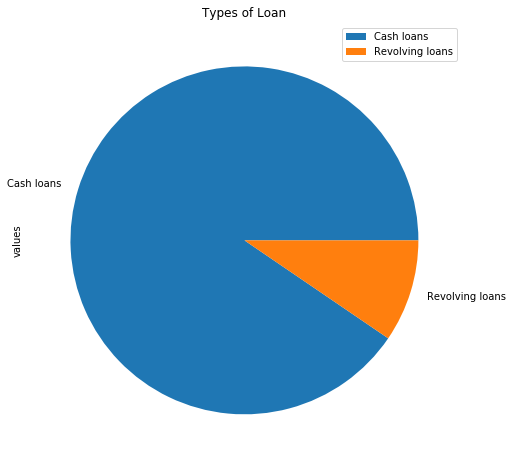

In [0]:
contract_val = application['NAME_CONTRACT_TYPE'].value_counts()
contract_df = pd.DataFrame({'values': contract_val.values},index=contract_val.index)
contract_df.plot.pie(y='values',title='Types of Loan',figsize=(8,8))

## Distribution of the AMT_CREDIT

Text(0, 0.5, 'Count of applicants')

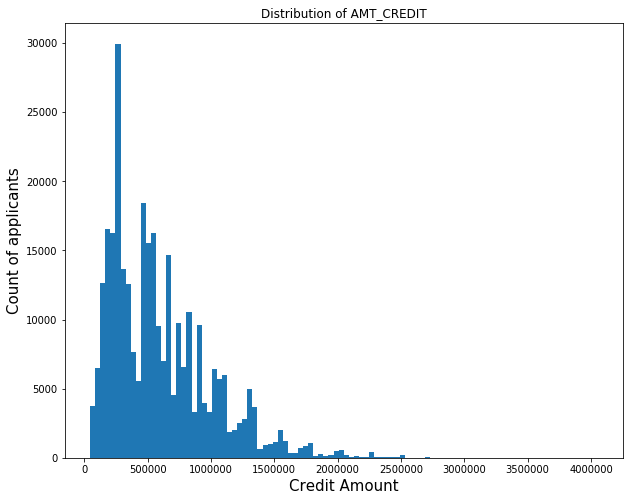

In [0]:
application['AMT_CREDIT'].plot.hist(bins=100,title='Distribution of AMT_CREDIT',figsize=(10,8))
plt.xlabel('Credit Amount',fontsize=15)
plt.ylabel('Count of applicants',fontsize=15)

## Distribution of the NAME_TYPE_SUITE

Text(0, 0.5, 'Count of applicants in %')

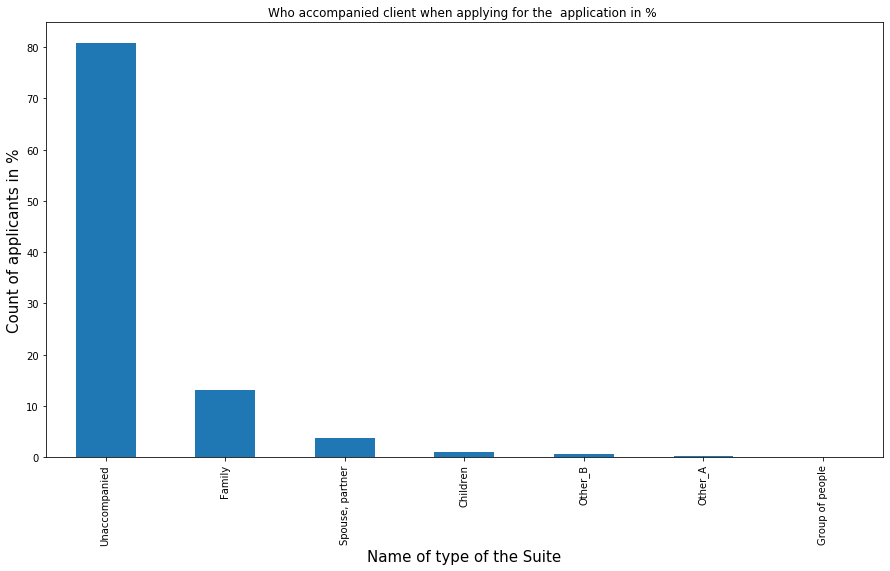

In [10]:
suite_val = (application['NAME_TYPE_SUITE'].value_counts()/len(application))*100
suite_val.plot.bar(title='Who accompanied client when applying for the  application in % ',figsize=(15,8))
plt.xlabel('Name of type of the Suite',fontsize=15)
plt.ylabel('Count of applicants in %',fontsize=15)

## Distribution of the NAME_TYPE_SUITE in term of loan repaid or not.

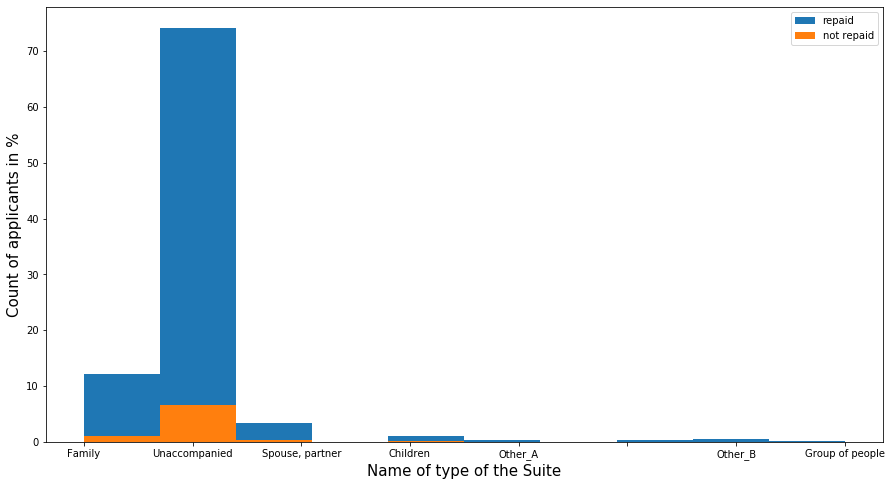

In [17]:
qual = pd.DataFrame({'col':application['NAME_TYPE_SUITE'].fillna(" "),'TARGET':application['TARGET']})
paid = qual[qual['TARGET']=='repaid']['col']
n_paid = qual[qual['TARGET']=='not repaid']['col']

plt.figure(figsize=(15,8))
plt.hist(paid,label='repaid', weights=(np.ones(len(paid)) / len(qual))*100)
plt.hist(n_paid,label='not repaid', weights=(np.ones(len(n_paid)) / len(qual))*100)
plt.xlabel('Name of type of the Suite',fontsize=15)
plt.ylabel('Count of applicants in %',fontsize=15)
plt.legend(loc='best')
plt.show()

## Distribution of the NAME_FAMILY_STATUS in terms of loan repaid or not.

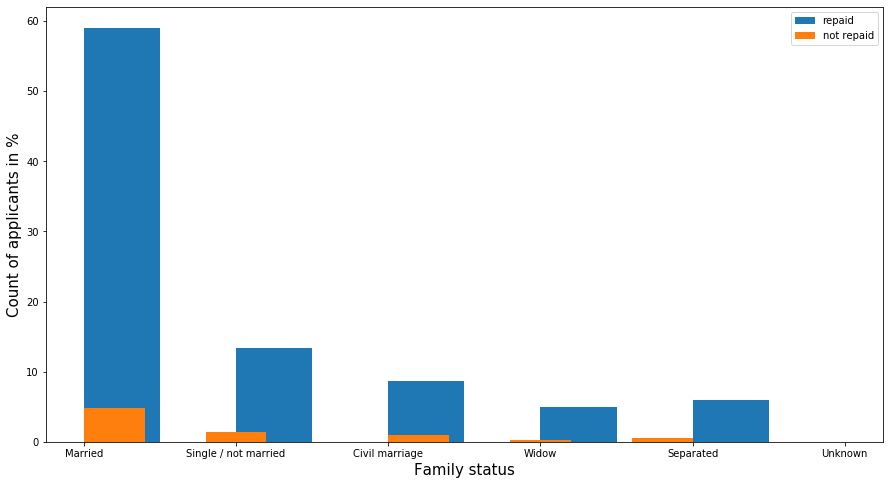

In [18]:
qual = pd.DataFrame({'col':application['NAME_FAMILY_STATUS'],'TARGET':application['TARGET']})
paid = qual[qual['TARGET']=='repaid']['col']
n_paid = qual[qual['TARGET']=='not repaid']['col']

plt.figure(figsize=(15,8))
plt.hist(paid,label='repaid', weights=(np.ones(len(paid)) / len(qual))*100)
plt.hist(n_paid,label='not repaid', weights=(np.ones(len(n_paid)) / len(qual))*100)
plt.xlabel('Family status',fontsize=15)
plt.ylabel('Count of applicants in %',fontsize=15)
plt.legend(loc='best')
plt.show()

## Distribution of the NAME_HOUSING_TYPE in terms of loan repaid or not.

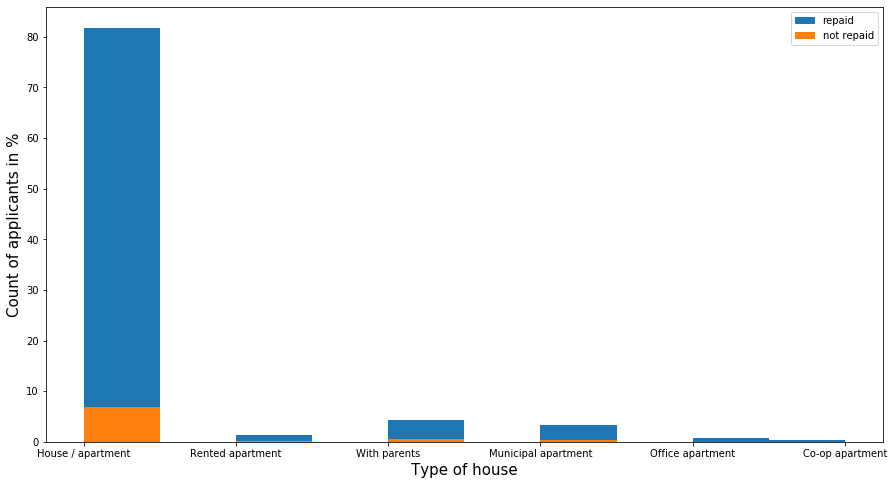

In [19]:
qual = pd.DataFrame({'col':application['NAME_HOUSING_TYPE'],'TARGET':application['TARGET']})
paid = qual[qual['TARGET']=='repaid']['col']
n_paid = qual[qual['TARGET']=='not repaid']['col']

plt.figure(figsize=(15,8))
plt.hist(paid,label='repaid', weights=(np.ones(len(paid)) / len(qual))*100)
plt.hist(n_paid,label='not repaid', weights=(np.ones(len(n_paid)) / len(qual))*100)
plt.xlabel('Type of house',fontsize=15)
plt.ylabel('Count of applicants in %',fontsize=15)
plt.legend(loc='best')
plt.show()

## Univarint analysis


# Distribution of the Age in terms of loan repaid or not.

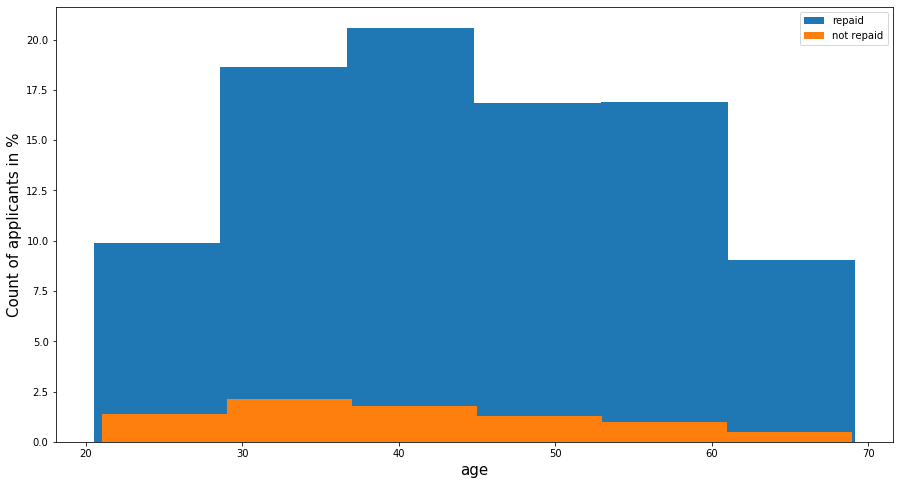

In [44]:
qual = pd.DataFrame({'col':application['DAYS_BIRTH']/-365,'TARGET':application['TARGET']})
paid = qual[qual['TARGET']=='repaid']['col']
n_paid = qual[qual['TARGET']=='not repaid']['col']

plt.figure(figsize=(15,8))
plt.hist(paid,label='repaid', weights=(np.ones(len(paid)) / len(qual))*100,bins=6)
plt.hist(n_paid,label='not repaid', weights=(np.ones(len(n_paid)) / len(qual))*100,bins=6)
plt.xlabel('age',fontsize=15)
plt.ylabel('Count of applicants in %',fontsize=15)
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


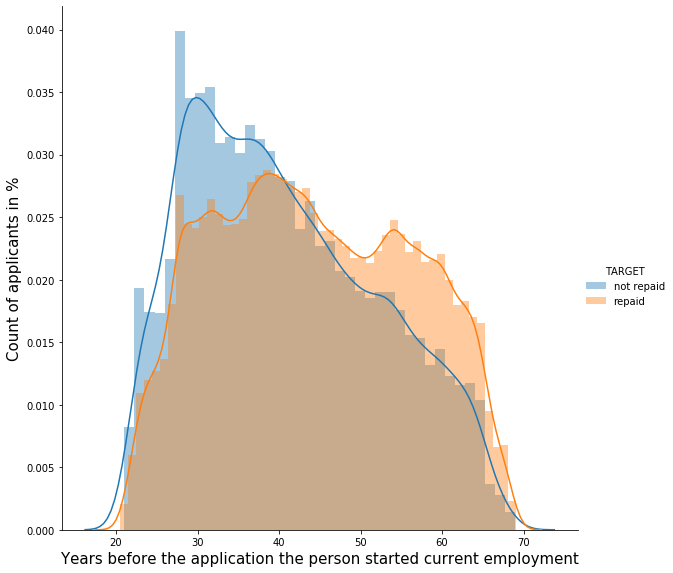

In [40]:
age = pd.DataFrame({'age': application['DAYS_BIRTH']/-365})
age['TARGET'] = application['TARGET']
sns.FacetGrid(age,hue='TARGET',size=8).map(sns.distplot,'age').add_legend()
plt.xlabel('Years before the application the person started current employment',fontsize=15)
plt.ylabel('Count of applicants in %',fontsize=15)
plt.show()

There are higher chances of younger candidates to not repay their loan than slightly older candidates

In [45]:
import gc
del age
gc.collect()

2112858

## Distribution of the NAME_EDUCATION_TYPE in terms of loan repaid or not.

In [0]:
qual = pd.DataFrame({'Education':application['NAME_EDUCATION_TYPE'],'TARGET':application['TARGET']})
paid = qual[qual['TARGET']=='repaid']['Education']
n_paid = qual[qual['TARGET']=='not repaid']['Education']


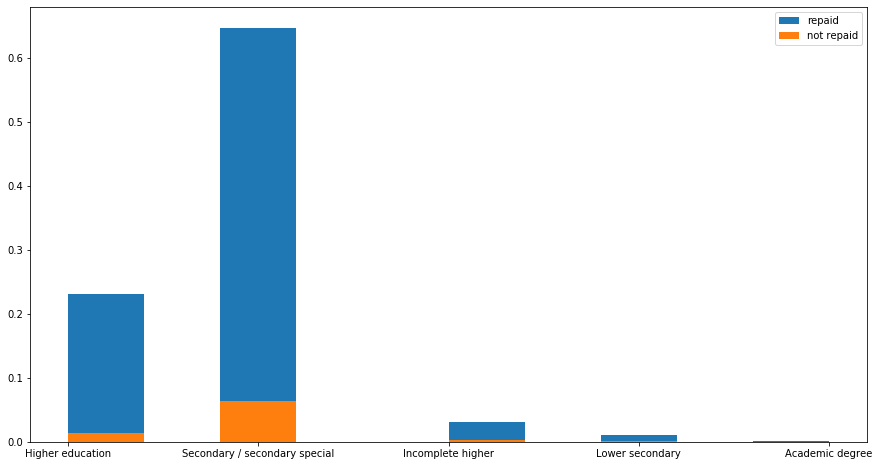

In [0]:
plt.figure(figsize=(15,8))
plt.hist(paid,label='repaid', weights=np.ones(len(paid)) / len(qual))
plt.hist(n_paid,label='not repaid', weights=np.ones(len(n_paid)) / len(qual))
plt.legend(loc='best')
plt.show()

There are more candidates with secondary education who have not repaid their loan.

## Distribution of the Experience in terms of loan repaid or not.Experience

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


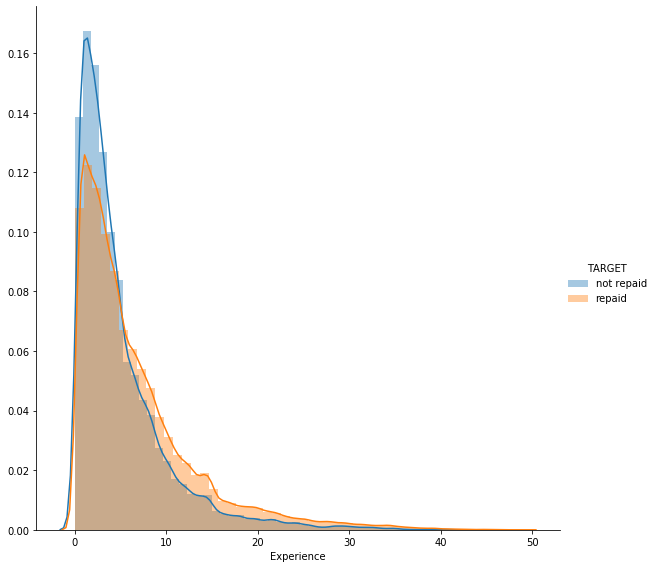

In [25]:
expe = pd.DataFrame({'Experience': application['DAYS_EMPLOYED']/-365,'TARGET':application['TARGET']})
sns.FacetGrid(expe,hue='TARGET',size=8).map(sns.distplot,'Experience').add_legend()

Less experienced candidate seems to have difficuties to repay their loan.

### Count of family members

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


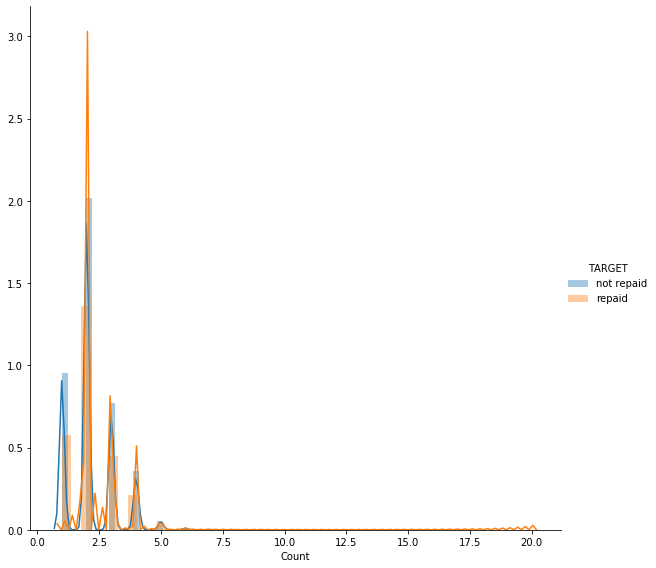

In [0]:
cnt = pd.DataFrame({'Count': application['CNT_FAM_MEMBERS'],'TARGET':application['TARGET']})
sns.FacetGrid(cnt,hue='TARGET',size=8).map(sns.distplot,'Count').add_legend()

### Income

In [0]:
qual = pd.DataFrame({'income': application['NAME_INCOME_TYPE'],'TARGET':application['TARGET']})
paid = qual[qual['TARGET']=='repaid']['income']
n_paid = qual[qual['TARGET']=='not repaid']['income']


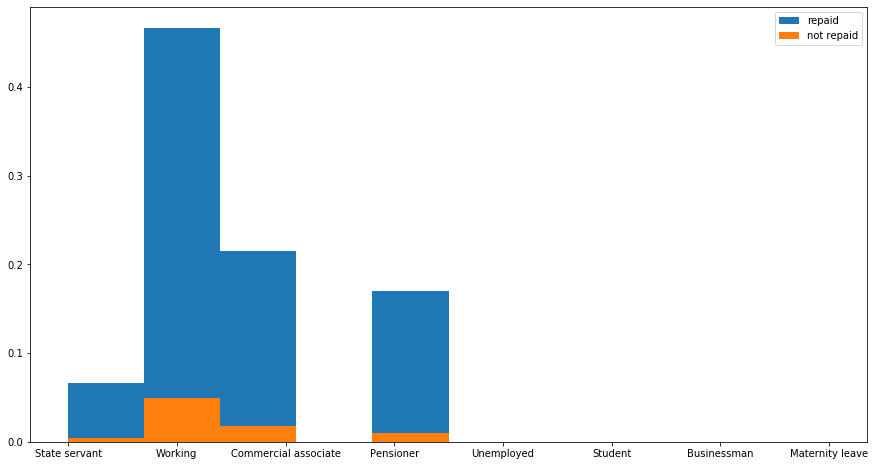

In [0]:
plt.figure(figsize=(15,8))
plt.hist(paid,label='repaid', weights=np.ones(len(paid)) / len(qual))
plt.hist(n_paid,label='not repaid', weights=np.ones(len(n_paid)) / len(qual))
plt.legend(loc='best')
plt.show()

### Credit

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


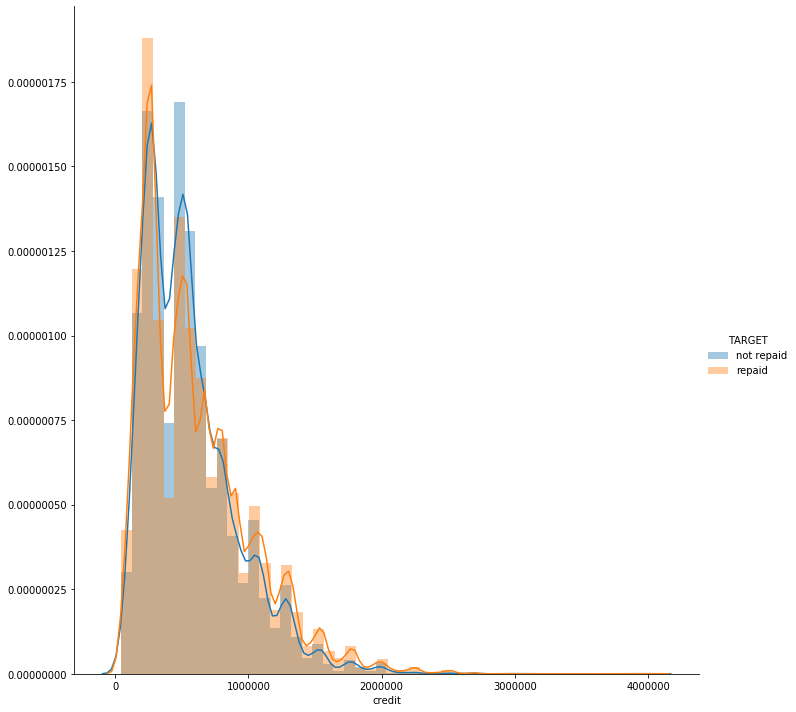

In [0]:
df = pd.DataFrame({'credit': application['AMT_CREDIT']})
df['TARGET'] = application['TARGET']
sns.FacetGrid(df,hue='TARGET',size=10).map(sns.distplot,'credit').add_legend()

Credit feature does not give much imformation about candidates loan repayment.